In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import graphviz

In [3]:
data = pd.read_csv('iots_skl.csv')
#display classes
data['decision']

0        0
1        0
2        1
3        0
4        1
5        0
6        1
7        0
8        1
9        0
10       0
11       0
12       1
13       0
14       0
15       1
16       0
17       0
18       0
19       1
20       0
21       1
22       1
23       0
24       1
25       1
26       1
27       0
28       1
29       1
        ..
14202    1
14203    1
14204    1
14205    0
14206    0
14207    0
14208    0
14209    0
14210    0
14211    0
14212    1
14213    0
14214    0
14215    0
14216    0
14217    0
14218    0
14219    1
14220    0
14221    0
14222    1
14223    0
14224    0
14225    0
14226    0
14227    0
14228    1
14229    1
14230    0
14231    1
Name: decision, Length: 14232, dtype: int64

In [4]:
#List of unique classes
data['decision'].unique()

array([0, 1])

In [5]:
# Number of entries for each unique classes
class_group = data.groupby('decision').apply(lambda x: len(x))
class_group

decision
0    7520
1    6712
dtype: int64

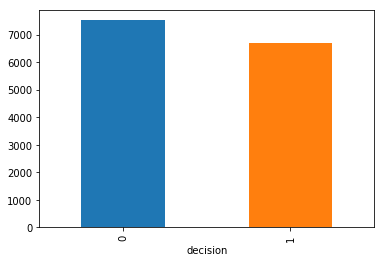

In [6]:
# Plot bar chart based on Class Label
class_group.plot(kind='bar', grid=False)

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction import DictVectorizer

cols_to_retain = ['whof', 'purposef', 'whatf', 'cstore', 'caction']

X_feature = data[cols_to_retain]
X_dict = X_feature.T.to_dict().values()

# turn list of dicts into a numpy array
vect = DictVectorizer(sparse=False)
X_vector = vect.fit_transform(X_dict)

In [8]:
# print the features
# vect.get_feature_names()

In [9]:
# 0 to 14 is train set
X_Train = X_vector
# 15th is test set
# X_Test = X_vector[-1:] 

# Used to vectorize the class label
le = LabelEncoder()
y_train = le.fit_transform(data['decision'])

from sklearn import tree

clf = tree.DecisionTreeClassifier(criterion='entropy')
clf = clf.fit(X_Train,y_train)

In [10]:
# Predict the test data, not seen earlier
le.inverse_transform(clf.predict(X_Train))
# prediction with the same training set
Train_predict = clf.predict(X_Train)

In [11]:
# The model predicted the training set correctly
(Train_predict == y_train).all()

False

In [12]:
# Metrics related to the DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
print ('Accuracy is:', accuracy_score(y_train, Train_predict))
print (classification_report(y_train, Train_predict))

Accuracy is: 0.773046655424
             precision    recall  f1-score   support

          0       0.77      0.81      0.79      7520
          1       0.78      0.73      0.75      6712

avg / total       0.77      0.77      0.77     14232



In [68]:
dot_data=tree.export_graphviz(clf, out_file='tree.dot')